### Number of images to generate

In [38]:
n = 100

### Path to images

In [2]:
path = './Cover/'

### Imports

In [3]:
import rawpy
import numpy as np

from imageio import imwrite, imread
import cv2 # pip install opencv-python
from PIL import Image as ImagePIL

from jpeg import jpeg
from scipy.fftpack import dct, idct
import skimage.io
import os

from multiprocessing import cpu_count
from multiprocessing.pool import ThreadPool as Pool

from time import time

import matplotlib.pyplot as plt

[pysteg.jpeg] $Id: __init__.py 2204 2011-04-05 11:43:38Z georg $


In [31]:
# Postprocess parameters : Modify the colors of the output but make it twice as fast as params=None
params = rawpy.Params(rawpy.DemosaicAlgorithm.LINEAR, half_size=False, four_color_rgb=False, use_camera_wb=False, \
                      use_auto_wb=False, user_wb=(1,1,1,1), output_color=rawpy.ColorSpace.raw, output_bps=16, \
                      user_flip=None, user_black=0, user_sat=None, no_auto_bright=True, auto_bright_thr=None, \
                      adjust_maximum_thr=0.0, bright=1.0, highlight_mode=rawpy.HighlightMode.Clip, exp_shift=None, \
                      exp_preserve_highlights=0.0, no_auto_scale=False, gamma=(1,1), chromatic_aberration=None, \
                      bad_pixels_path=None)

"""
params = rawpy.Params(rawpy.DemosaicAlgorithm.LINEAR, half_size=False, four_color_rgb=False, use_camera_wb=False, \
                      use_auto_wb=False, user_wb=(1,1,1,1), output_color=rawpy.ColorSpace.raw, output_bps=16, \
                      user_flip=None, user_black=0, user_sat=None, no_auto_bright=True, auto_bright_thr=None, \
                      adjust_maximum_thr=0.0, bright=1.0, highlight_mode=rawpy.HighlightMode.Clip, exp_shift=None, \
                      exp_preserve_highlights=0.0, no_auto_scale=False, gamma=(2.222, 4.5), chromatic_aberration=None, \
                      bad_pixels_path=None)
"""

'\nparams = rawpy.Params(rawpy.DemosaicAlgorithm.LINEAR, half_size=False, four_color_rgb=False, use_camera_wb=False,                       use_auto_wb=False, user_wb=(1,1,1,1), output_color=rawpy.ColorSpace.raw, output_bps=16,                       user_flip=None, user_black=0, user_sat=None, no_auto_bright=True, auto_bright_thr=None,                       adjust_maximum_thr=0.0, bright=1.0, highlight_mode=rawpy.HighlightMode.Clip, exp_shift=None,                       exp_preserve_highlights=0.0, no_auto_scale=False, gamma=(2.222, 4.5), chromatic_aberration=None,                       bad_pixels_path=None)\n'

### Classes

In [5]:
class conf(object):
    class generate(object):
        class NS(object):
            class jpeg(object):
                pass
            class dev(object):
                pass
            class mono(object):
                pass
    class embed(object):
        class NS(object):
            class a(object):
                pass
            class b(object):
                pass
        class stego_path:
            pass
        class cover_path:
            pass

    class imgs(object):
        class QF(object):
            pass

### Conversion functions

In [35]:
def raw_to_jpeg_python(raw,imagefile):
    
    QF = conf.imgs.QF
    
    rgb = raw.postprocess(params)
    
    if rgb.shape[2] == 4:
        rgb = cv2.cvtColor(rgb, cv2.COLOR_RGBA2RGB)
    
    if not conf.generate.NS.mono :
        imwrite(imagefile+'.tiff', rgb)        
        img_rgb = ImagePIL.open(imagefile+'.tiff')
    else:
        img_rgb = ImagePIL.fromarray(rgb[:,:,0])
        img_rgb.mode = 'I'
        img_rgb = img_rgb.point(lambda i:i*(1./256)).convert('L')
        
    h, w = img_rgb.size

    factor = min(h,w) / 512
    x = int(h/factor)
    y = int(w/factor)

    img_rgb = img_rgb.resize((x, y))

    if x > y: # Photo paysage
        img_rgb = img_rgb.crop(((x-512)/2, 0, (x-512)/2 + 512, 512))

    else: # Photo portrait
        img_rgb = img_rgb.crop((0, (y-512)/2, 512, (y-512)/2 + 512))
    
    img_rgb.save(imagefile + '.jpg', quality = QF)
    
    if not conf.generate.NS.mono :
        os.remove(imagefile+'.tiff')

### Create pseudo cover image n° i

In [7]:
def make_pseudo_cover(i):
    
    print(i)
    
    seed = hash(cover_file[-9:-4])%(2**32-i)

    np.random.seed(seed)

    sens_noise = np.random.randn(h, h) * var_pseudo_cover_signal

    im_pseudo_cover = im_cover[:,debut:fin] + sens_noise

    im_pseudo_cover[im_pseudo_cover>lvl_max]=lvl_max
    im_pseudo_cover[im_pseudo_cover<0]=0
    
    raw_im.raw_image_visible[:,debut:fin] = im_pseudo_cover

    base_name = os.path.basename(cover_file)
    pseudo_cover_file = conf.embed.pseudo_cover_path + base_name[0:-4] + '_' + str(i)
    
    raw_to_jpeg_python(raw_im, pseudo_cover_file)

### Generate n images

In [8]:
def generate(n):

    t = time()
    
    nb_cores = cpu_count()
    pool = Pool(nb_cores)
    
    pool.map(make_pseudo_cover, range(n))
    pool.close()
    pool.join()
                
    print("Temps :", time() - t)

#### File names (path)

In [9]:
files_list = os.listdir(path)
print(files_list)

['Mono2.DNG', 'Mono3.DNG', 'Mono1.DNG', 'Mono4.DNG', 'Mono5.DNG', '4468.cr2', '4959.pef', '3280.cr2', '6934.nef', '4750.cr2', 'RAW_CANON_PRO70_SRGB.CRW']


In [10]:
u = time()

#### 3280.cr2

3280.cr2
0
1
2
3
4
5
6
7
8
9
10
1112
13
14
15
16
17
18
1920
21
22
23
24
25
26
27
28
29
30
3132
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53

54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69

7071


72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Temps : 83.01176834106445


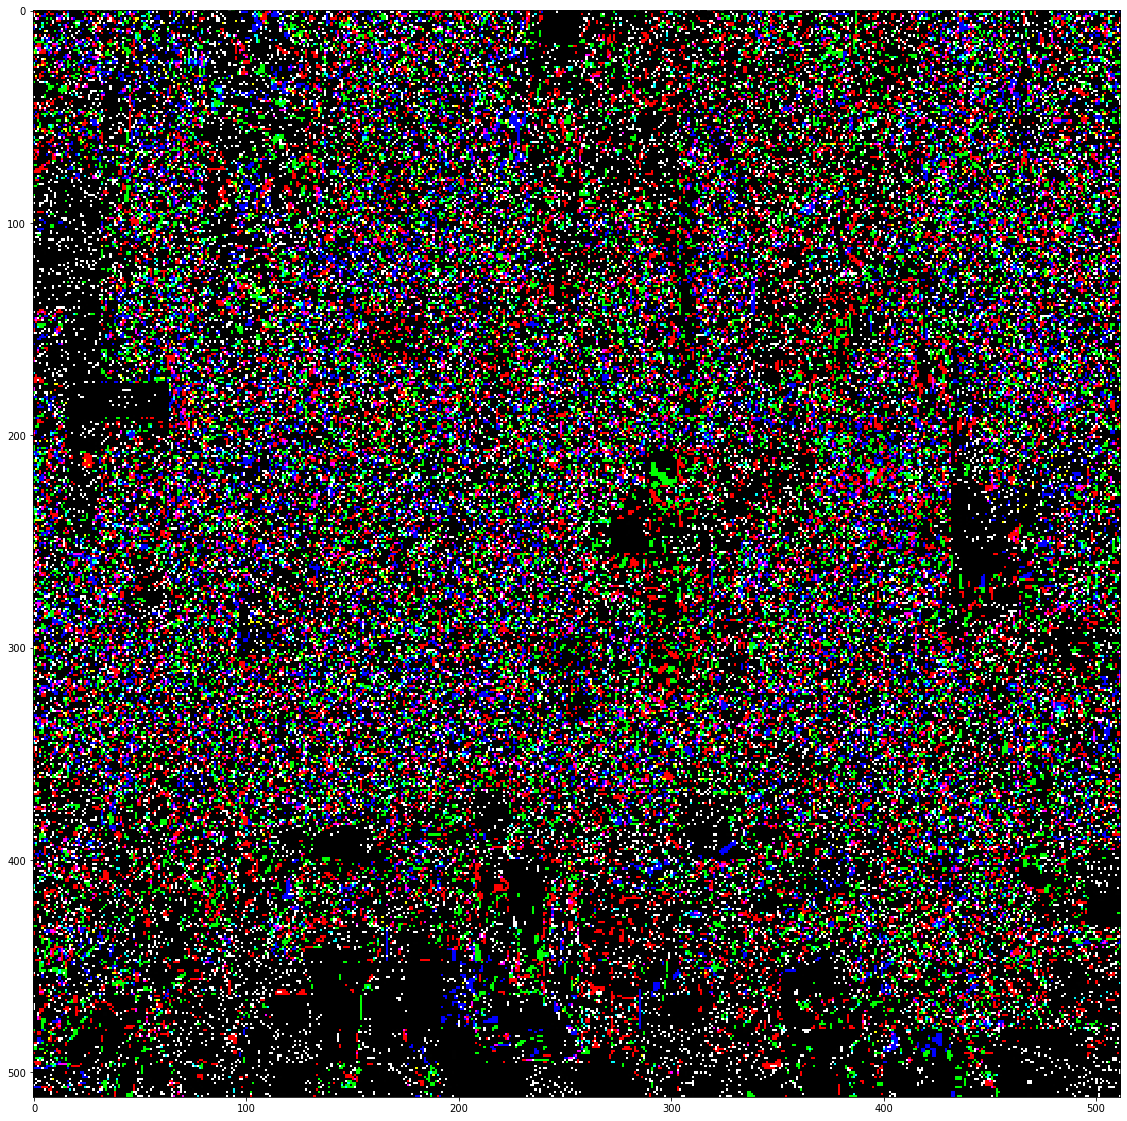

In [11]:
file = '3280.cr2'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.1 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg')  

plt.figure(figsize = (20, 20))
plt.imshow(im_0 - im_1)

#### 4468.cr2

4468.cr2
0
1
2
3
4
5
6
7
8
9
10
11
1213
14
15
16
17
18
19
20
21
22
23
24
25
26
2728
29
30
31
32
33
34
35
36
37
38

39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66

67
68
697071


72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Temps : 83.00129199028015


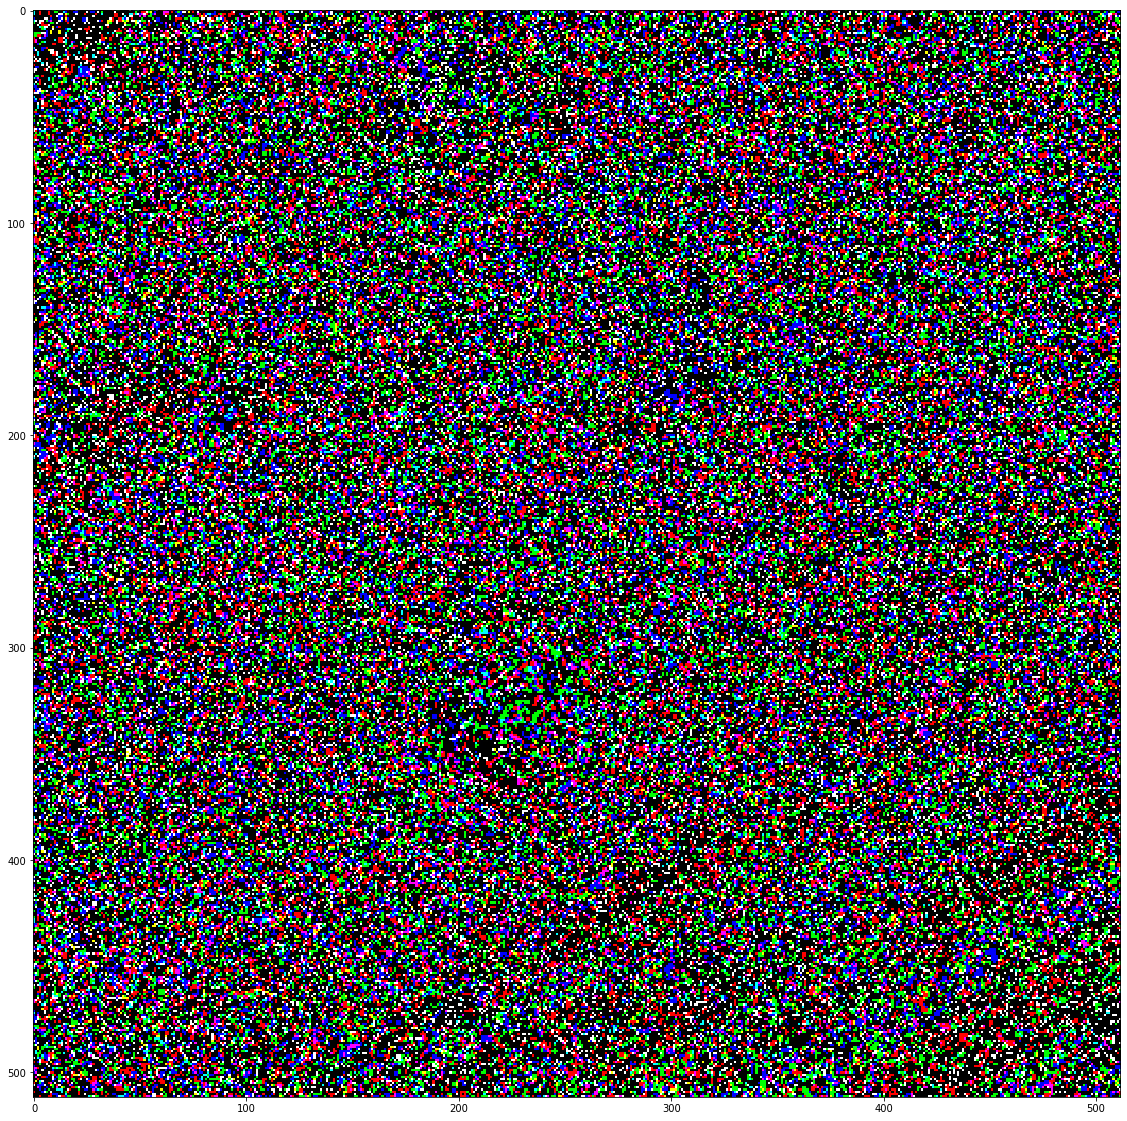

In [12]:
file = '4468.cr2'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.5 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal < 0] = 0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

plt.figure(figsize = (20, 20))
plt.imshow(im_0 - im_1)

#### 4750.cr2

4750.cr2
0
1
2
3
4
5
6
7
8
9
10
11
1213
14
15
16
17
18
19
20
21
22
23
24

25
26
2728
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52

5354
55
56
57
58
59
60
61
62
63
64

65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Temps : 62.63072371482849


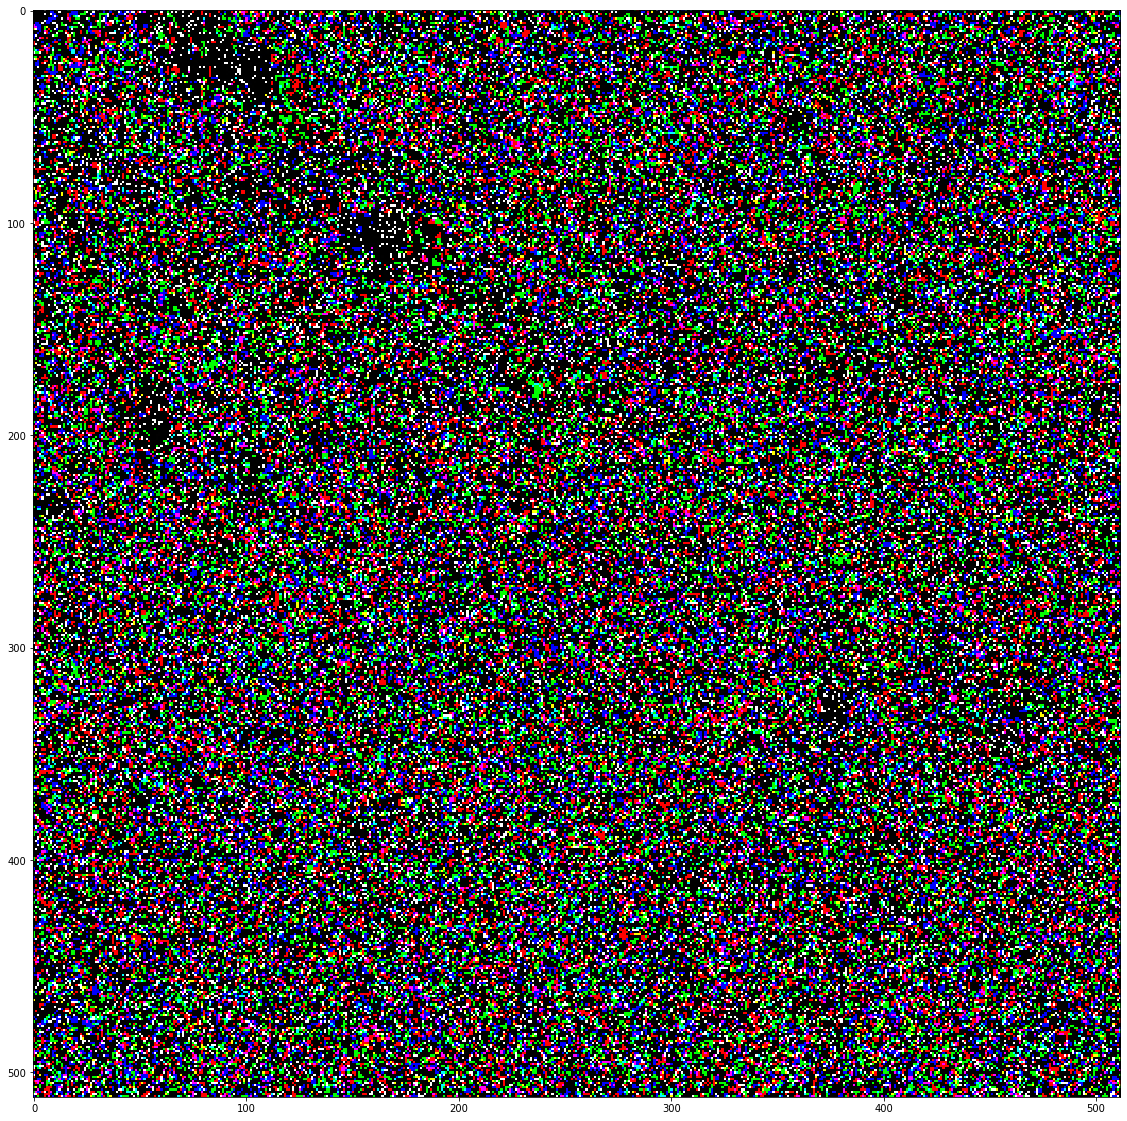

In [13]:
file = '4750.cr2'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.1 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg')  

plt.figure(figsize = (20, 20))
plt.imshow(im_0 - im_1)

#### 4959.pef

4959.pef
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
1516
17
18
19
20
21
22
2324
25
26
27
28
29
30
31
3233
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50

51
52
53
54
55
56
57
58
59

60
61
62
63
64
65
66
67
68
69

70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Temps : 80.834890127182


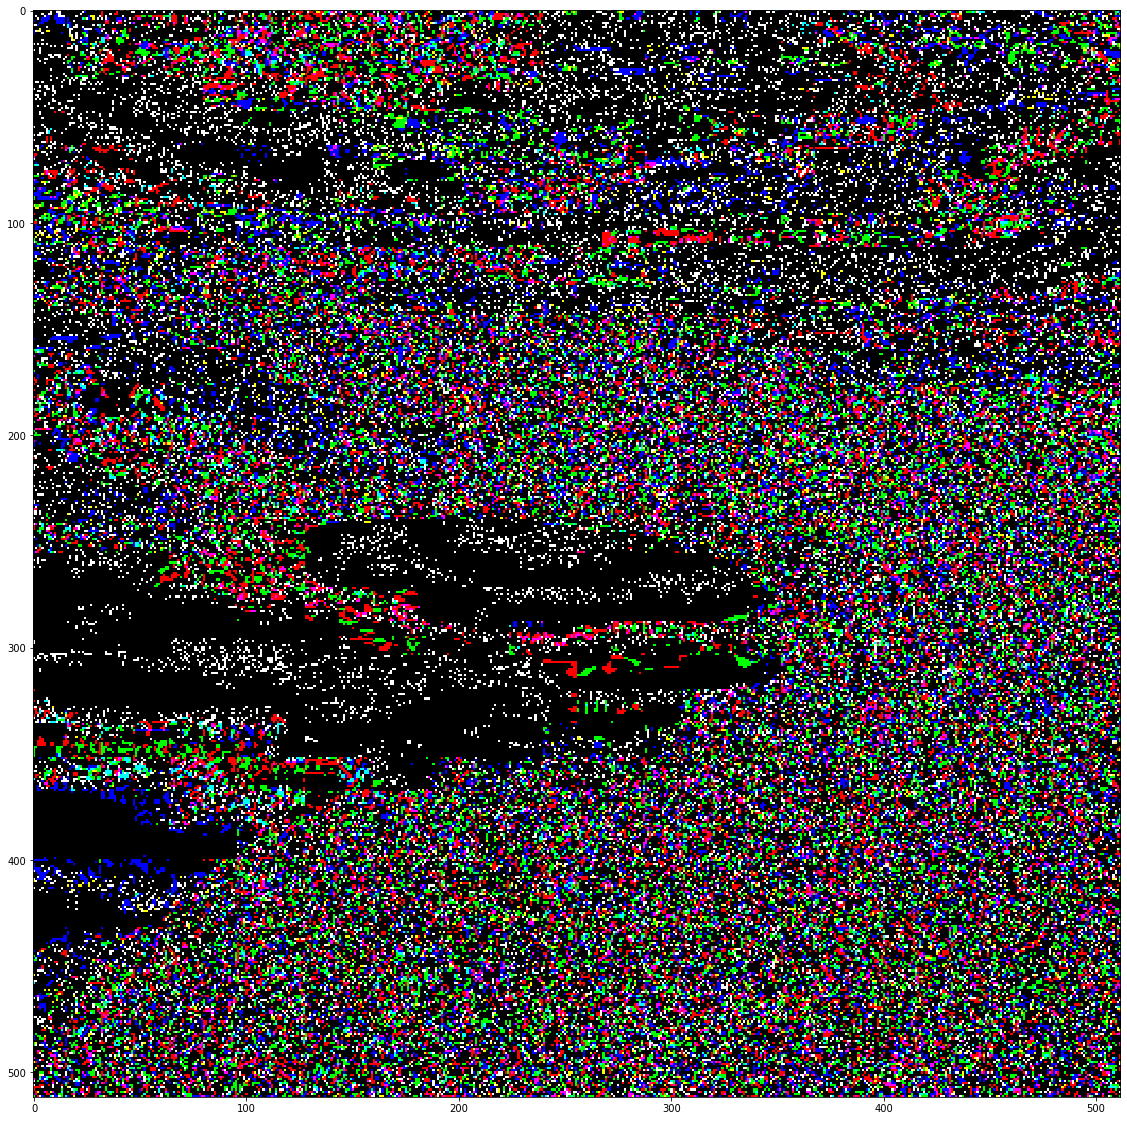

In [14]:
file = '4959.pef'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.3 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

plt.figure(figsize = (20, 20))
plt.imshow(im_0 - im_1)

#### 6934.nef

6934.nef
0
1
2
3
4
5
6
7
8
910
11
12
1314
15
16
17
18
19
20
21
22
23
24
25
26
27

28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Temps : 34.769773960113525


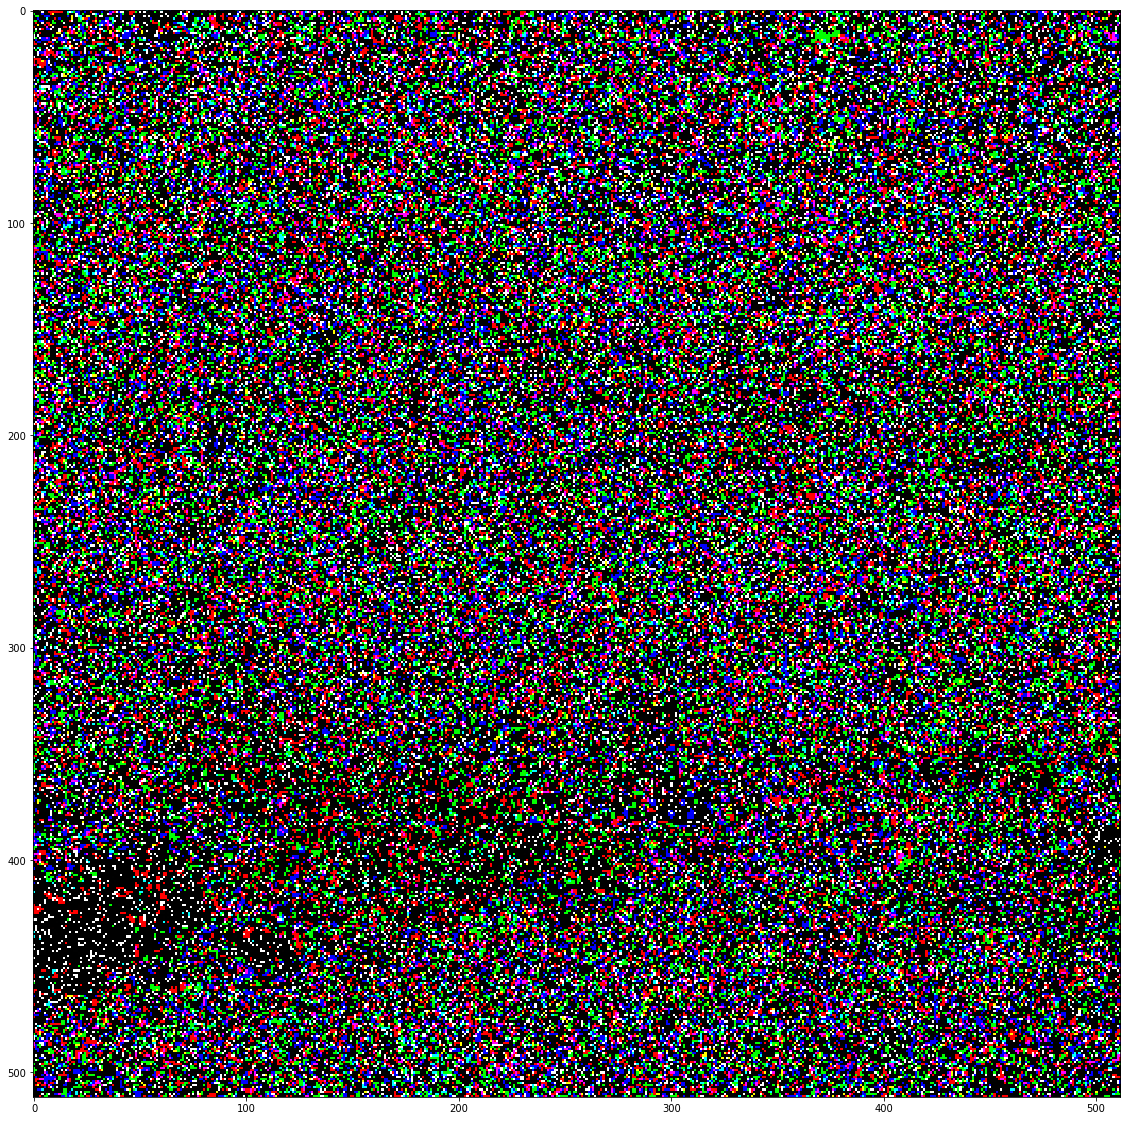

In [15]:
file = '6934.nef'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.05 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

plt.figure(figsize = (20, 20))
plt.imshow(im_0 - im_1)

In [16]:
print(time() - u)

351.82679271698


#### RAW_CANON_PRO70_SRGB.CRW

RAW_CANON_PRO70_SRGB.CRW
0
1
2
3
4
5
6
7
8
9
10
11
1213
14
15
16
17
18
19
20
21
22
23
24
25
26
2728
29
30
31
32
33
34
35
36
37
38
39

40
41
4243
44
45
46
47
48
49
50
51

52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68697071




72
73
74
75
7677

78
79
80
81
82
83
84
85
86
87
8889

90
91
92
93
94
95
96
9798

99
Temps : 10.626437425613403


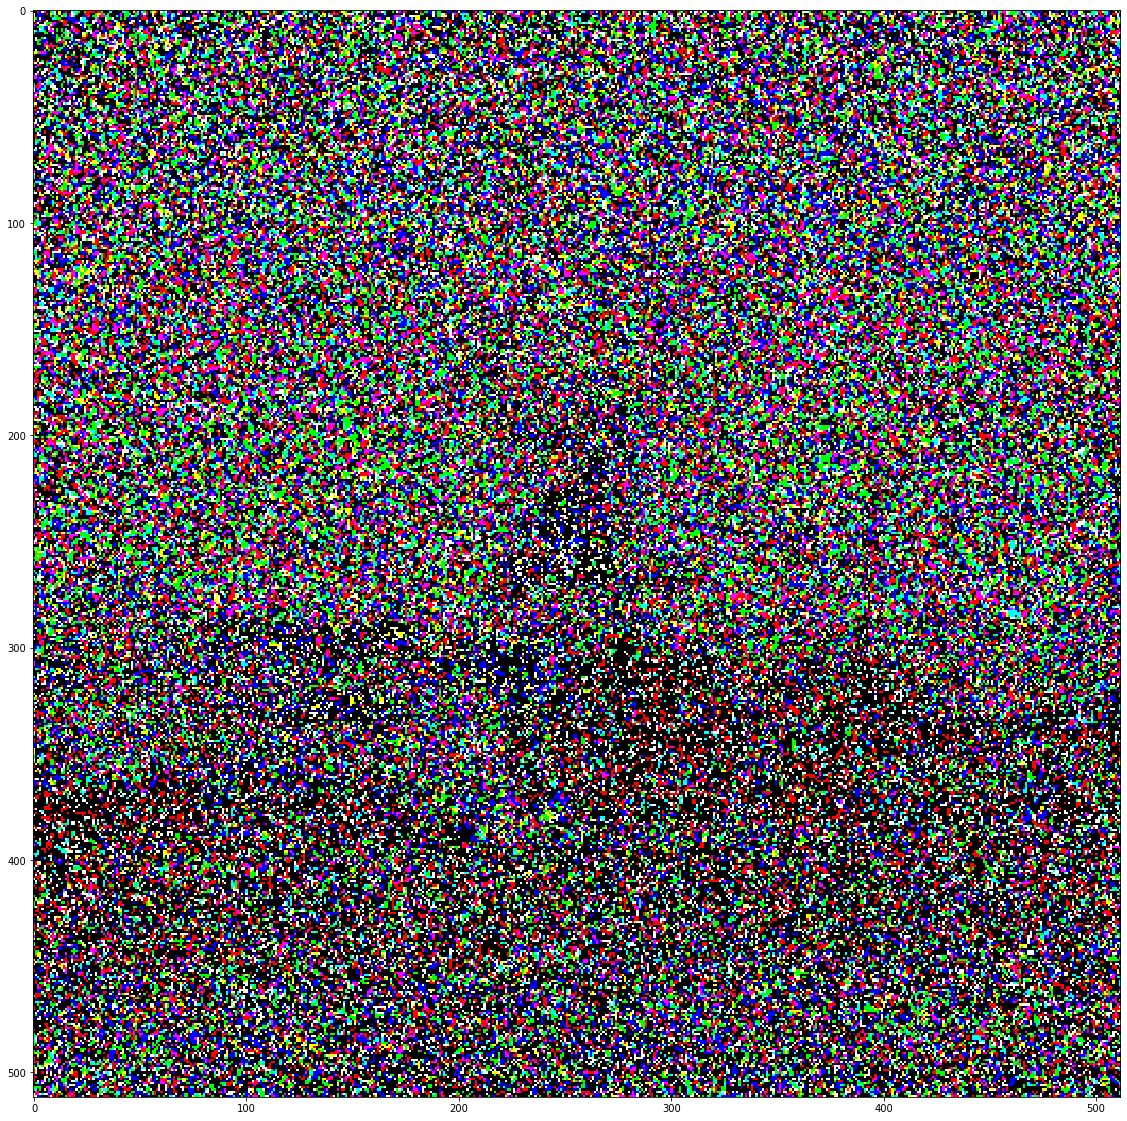

In [39]:
file = 'RAW_CANON_PRO70_SRGB.CRW'
print(file)
cover_file = path + file
raw_im = rawpy.imread(cover_file)

conf.generate.NS.jpeg = True
conf.generate.NS.dev = 'python'
conf.generate.NS.mono = False
conf.embed.NS.a = 0.05 # Mono 1000 -> 1250: a = 1.37
conf.embed.NS.b = 0 # Mono 1000 -> 1250: a = 3607
conf.embed.cover_path = path
conf.embed.pseudo_cover_path = './Pseudo_Cover/' + file + '/'

if not os.path.exists('./Pseudo_Cover/'):
    os.mkdir('./Pseudo_Cover/')
    
if not os.path.exists(conf.embed.pseudo_cover_path):
    os.mkdir(conf.embed.pseudo_cover_path)

conf.imgs.QF = 100

nb_bits = 14
lvl_max = 2**nb_bits-1

a = conf.embed.NS.a #0.8# * 2**nb_bits 
b = conf.embed.NS.b #-800# * 2**(2*nb_bits)

im_cover = np.copy(raw_im.raw_image_visible)

h, w = im_cover.shape

debut = int((w-h)/2) # RAW ==> h < w
fin = int((w+h)/2)

im_pseudo_cover = np.zeros((h, h))
var_pseudo_cover_signal = im_cover[:,debut:fin]*a + b
var_pseudo_cover_signal[var_pseudo_cover_signal<0]=0
var_pseudo_cover_signal = np.sqrt(var_pseudo_cover_signal)

generate(n)

im_0 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_0.jpg') 
im_1 = imread(conf.embed.pseudo_cover_path + cover_file[7:-4] + '_1.jpg') 

plt.figure(figsize = (20, 20))
plt.imshow(im_0 - im_1)